# Decision Trees

#### Welcome to the jungle of car auctions reality :)

#### Import Modules

In [4]:
# Import Modules and functions
# ----------------------------
from Functions import *
from Modules   import *

#### Read DataFrame

In [5]:
df    = pd.read_csv('..\\Data\\data_train.csv')
X_aim = pd.read_csv('..\\Data\\features_aim.csv')
# --- Clean and prepare data and Aim -----

X_train, X_test, y_train, y_test, X_aim = CLEAN_All_DATA(df, X_aim)

### Decision Trees

#### Base Decision Tree Model with Max_depth = 1

In [28]:
# Instantiate DT model
preprocessor     = ColumnTransformer([('num', 'passthrough', num_cols),
                                      ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
                                    ])

# The classifier:
model_DT         = DecisionTreeClassifier(max_depth    = 1, 
                                          class_weight = 'balanced', 
                                          random_state = 42
                                         )

pipeline_DT_base = Pipeline([('preprocessor', preprocessor),
                             ('DTClassifier', model_DT)
                            ])

#### Model Fit & scores

In [29]:
pipeline_DT_base.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice',
                                                   'MMRCurrentAuctionAveragePrice',
                                                   'MMRCurrentAuctionCleanPrice',
                                                   'MMRCurrentRetailAveragePrice',
                                                   'MMRCurrentRetailCleanPrice',
                                                   'VehB...
                                                  ['Auction', 'VehicleAge',
                                                   'Make', 'WheelType',
                                                   'VehYear', 'Model', 'Trim',
                                                   'SubModel', 'Color',
                                                   'Transmission',
                                                   'Nationality', 'Size',
                                                   'TopThreeAmericanName',
                                                   'IsOnlineSale', 'PRIMEUNIT',
                                                   'AUCGUART', 'BYRNO',
                                                   'VNZIP1', 'VNST',
                                                   'PurchDate_year',
                                                   'PurchDate_month',
                                                   'PurchDate_dayofweek'])])),
                ('DTClassifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=1,
                                        random_state=42))])

In [30]:

# --------------------------------------------------------------------

pred_DT_base      = pipeline_DT_base.predict(X_test)
f1_DT_base        = f1_score(y_test, pred_DT_base)
recall_DT_base    = recall_score(y_test, pred_DT_base)
precision_DT_base = precision_score(y_test, pred_DT_base)
accuracy_DT_base  = accuracy_score(y_test, pred_DT_base)

DT_metrics        = pd.DataFrame({
                                 'Model'    : ['logistic Regression'],
                                 'F1 Score' : [f1_DT_base],
                                 'Recall'   : [recall_DT_base],
                                 'Precision': [precision_DT_base],
                                 'Accuracy' : [accuracy_DT_base]
                                })

#### Decision Tree Plot

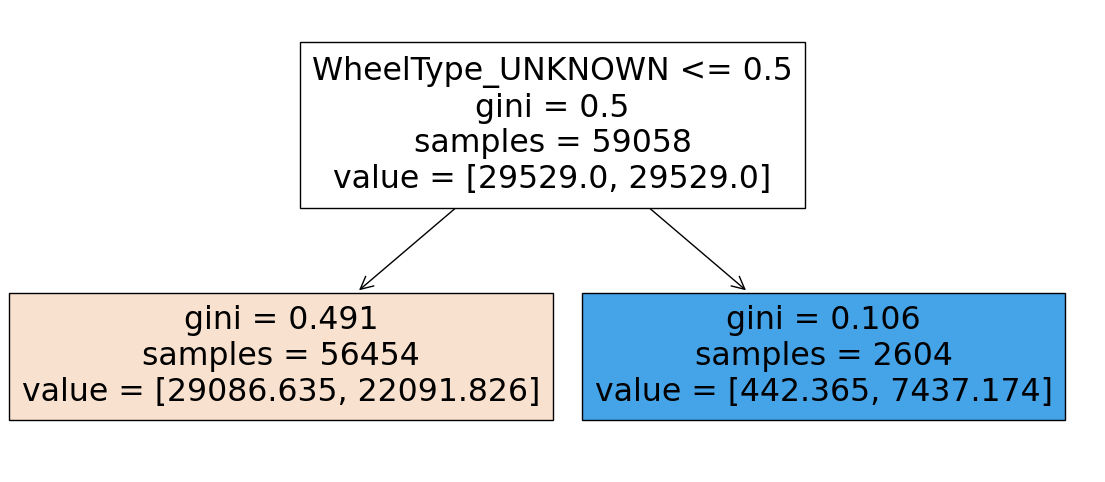

In [31]:

fitted_tree = pipeline_DT_base.named_steps['DTClassifier']                # Extracting the DT from pipeline

# Feature names 
ohe         = (pipeline_DT_base.named_steps['preprocessor']               # Extracting the OneHotEncoder
                       .named_transformers_['cat'])                                 
cat_feature_names = ohe.get_feature_names_out(input_features = cat_cols)  # Getting OH encoded feature names
feature_names     = num_cols + list(cat_feature_names)                    # Concatenating with numerical feature names

#  ---------------------------------------------------------------------------------------------------------------
plt.figure(figsize      = (14,6))  
plot_tree(decision_tree = fitted_tree,
          feature_names = feature_names,
          filled        = True);

#### Scores and confusion matrix

Scoring of DT Classifier


Model,F1 Score,Recall,Precision,Accuracy
logistic Regression,0.347982,0.229314,0.721190,0.889211


-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


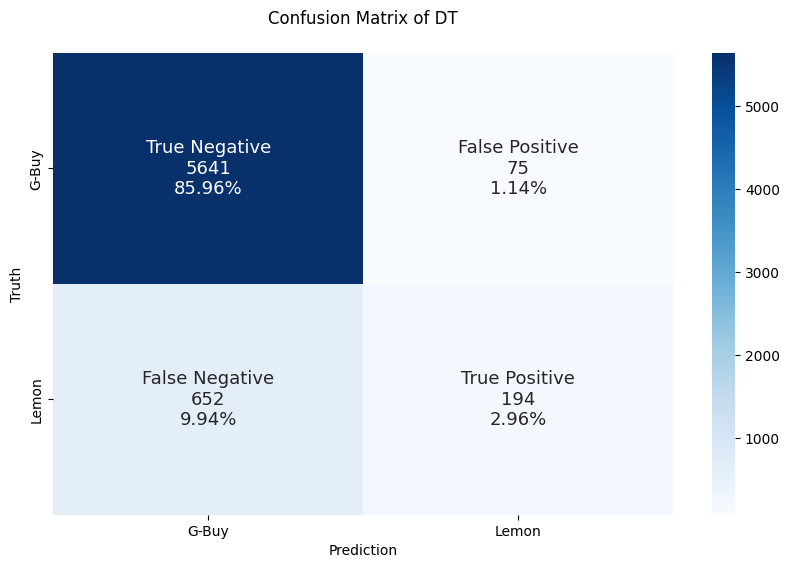

In [32]:
print('Scoring of DT Classifier')
# -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
display(DT_metrics.style.hide())
print('-- '*30)
Confusion_Matrix_Func(y_test, pred_DT_base, 'DT');

#### Decision Tree model with max depth from 1 to 7

In [33]:
scoring = {'f1'       : 'f1',
           'recall'   : 'recall',
           'precision': 'precision',
           'accuracy' : 'accuracy'}

scores = []
# Iterate through each parameter, fit model, and store metrics
for i in range(1, 8):
    pipeline_DT_base.set_params(DTClassifier__max_depth = i)
    
    cv_results    = cross_validate(pipeline_DT_base, 
                                   X_train, 
                                   y_train, 
                                   scoring = scoring, 
                                   cv      = 5)
    
    pipeline_DT_base.fit(X_train, y_train)
    pred_grid      = pipeline_DT_base.predict(X_test)
    
    f1_test        = f1_score(y_test       , pred_grid)
    recall_test    = recall_score(y_test   , pred_grid)
    precision_test = precision_score(y_test, pred_grid)
    accuracy_test  = accuracy_score(y_test , pred_grid)
    
    scores.append({'Max_depth'     : i,
                   'Val f1'        : cv_results['test_f1'].mean(),
                   'Val recall'    : cv_results['test_recall'].mean(),
                   'Val Precision' : cv_results['test_precision'].mean(),
                   'Val_accuracy'  : cv_results['test_accuracy'].mean(),
                   'Test f1'       : f1_test,
                   'Test recall'   : recall_test,
                   'Test precision': precision_test,
                   'Test accuracy' : accuracy_test})

pd.DataFrame(scores).style.hide()


Max_depth,Val f1,Val recall,Val Precision,Val_accuracy,Test f1,Test recall,Test precision,Test accuracy
1,0.370649,0.251858,0.702071,0.894917,0.347982,0.229314,0.721190,0.889211
2,0.320118,0.594794,0.219618,0.688509,0.330179,0.598109,0.228031,0.687138
3,0.373288,0.421877,0.335408,0.825697,0.376172,0.403073,0.352637,0.827644
4,0.357112,0.515853,0.279224,0.767380,0.368514,0.495272,0.293417,0.781164
5,0.365848,0.500689,0.288863,0.786498,0.364660,0.497636,0.287765,0.776440
6,0.356100,0.533747,0.270089,0.761269,0.371823,0.492908,0.298497,0.785279
7,0.339668,0.623599,0.236131,0.698871,0.349025,0.613475,0.243891,0.704968


#### Decision Tree Model, the pipeline and the gridsearch

In [34]:

preprocessor   = ColumnTransformer([('num', 'passthrough', num_cols),
                                    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
                                   ])

model_Tree     = DecisionTreeClassifier(random_state=42)

pipeline_Tree  = Pipeline([('preprocessor', preprocessor),
                           ('DTClassifier' , model_Tree)
                         ])

param_grid    = {'DTClassifier__max_depth'        : [22, 23,24,25],  
                 'DTClassifier__min_samples_split': [5, 6, 7],  
                 'DTClassifier__min_samples_leaf' : [1, 2]
                }

scoring       = {'accuracy': make_scorer(accuracy_score),
                 'recall'  : make_scorer(recall_score),
                 'f1'      : make_scorer(f1_score)
                }

model_dt_grid = GridSearchCV(pipeline_Tree, 
                             param_grid         = param_grid, 
                             cv                 = 3, 
                             scoring            = 'f1', # or --> scoring,
                           # refit              = 'f1',
                             n_jobs             = 8, 
                             return_train_score = True
                            )


#### Let's fit it

In [35]:
model_dt_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['MMRAcquisitionAuctionAveragePrice',
                                                                          'MMRAcquisitionAuctionCleanPrice',
                                                                          'MMRAcquisitionRetailAveragePrice',
                                                                          'MMRAcquisitonRetailCleanPrice',
                                                                          'MMRCurrentAuctionAveragePrice',
                                                                          'MMRCurrentAuctionCleanPrice',
                                                                          'MMRCurrentRetailAveragePrice',
                                                                          'MMRCu...
                                                                          'IsOnlineSale',
                                                                          'PRIMEUNIT',
                                                                          'AUCGUART',
                                                                          'BYRNO',
                                                                          'VNZIP1',
                                                                          'VNST',
                                                                          'PurchDate_year',
                                                                          'PurchDate_month',
                                                                          'PurchDate_dayofweek'])])),
                                       ('DTClassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=8,
             param_grid={'DTClassifier__max_depth': [22, 23, 24, 25],
                         'DTClassifier__min_samples_leaf': [1, 2],
                         'DTClassifier__min_samples_split': [5, 6, 7]},
             return_train_score=True, scoring='f1')

#### The scores

In [36]:

optimised_dt_grid   = model_dt_grid.best_estimator_
optimised_dt_params = model_dt_grid.best_params_



# Evaluate the model:
pred_dt_grid       = model_dt_grid.predict(X_test)
f1_dt_grid         = f1_score(y_test       , pred_dt_grid)
recall_dt_grid     = recall_score(y_test   , pred_dt_grid)
precision_dt_grid  = precision_score(y_test, pred_dt_grid)
accuracy_dt_grid   = accuracy_score(y_test , pred_dt_grid)


grid_DT_metrics    = pd.DataFrame({
                                    'Model'    : ['GridSearch Optimised DT'],
                                    'F1 Score' : [f1_dt_grid],
                                    'Recall'   : [recall_dt_grid],
                                    'Precision': [precision_dt_grid],
                                    'Accuracy' : [accuracy_dt_grid]
                                    })

#### Optimised model and hyperparameters

In [37]:
print('Scoring of GridSearch Optimised LR Classifier')
print('Optimised DT Model:'     , optimised_dt_grid)
print('-- '*30)
print("Optimised DT Parameters:", optimised_dt_params)

Scoring of GridSearch Optimised LR Classifier
Optimised DT Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice',
                                                   'MMRCurrentAuctionAveragePrice',
                                                   'MMRCurrentAuctionCleanPrice',
                                                   'MMRCurrentRetailAveragePrice',
                                                   'MMRCurrentRetailCleanPrice',
                                                   'VehB...
                                                  ['Auction', 'VehicleAge',
                  

#### Scores and confusion matrix

Scoring of GridSearch Optimised DT


Model,F1 Score,Recall,Precision,Accuracy
GridSearch Optimised DT,0.358653,0.270686,0.531323,0.875190


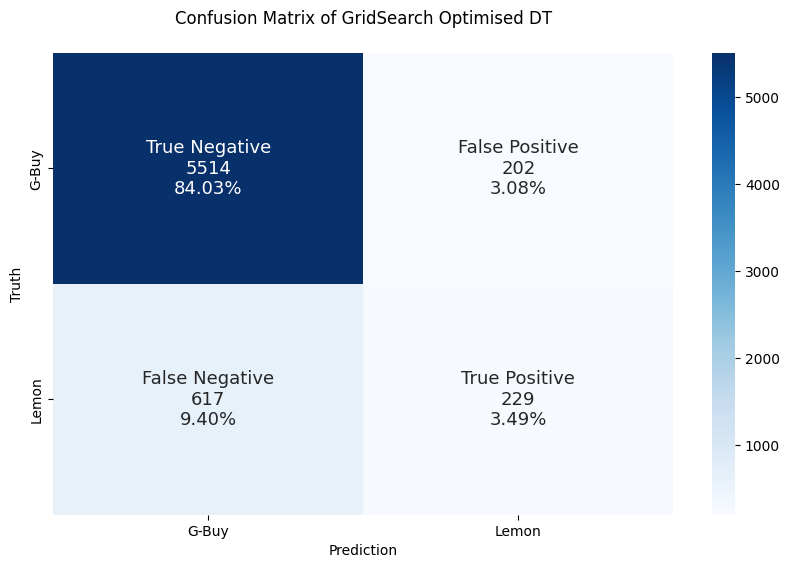

In [38]:
print('Scoring of GridSearch Optimised DT')
display(grid_DT_metrics.style.hide())
Confusion_Matrix_Func(y_test, pred_dt_grid, 'GridSearch Optimised DT');

#### Save the optimised DT model as pickle

In [39]:
# Save the model as it is quite demanding

directory_path = r"D:\Visual Studio Code\Used Cars Sales\Pickle"
filename = "optimised_GridSearch_DT.p"

pickle.dump(model_dt_grid, open(directory_path + "\\" + filename, "wb"))